In [98]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [99]:
cars=pd.read_csv("cars.csv")

In [100]:
cars_train=cars[['mpg','hp']]
cars_train


xdata=cars_train['mpg'].tolist()
ydata=cars_train['hp'].tolist()

print(xdata, ydata)

[21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4] [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]


In [101]:
x=tf.placeholder(tf.float32, shape=[None])
y=tf.placeholder(tf.float32, shape = [None])
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
hf = w*x + b
# opt=tf.train.GradientDescentOptimizer(0.01)
cost=tf.reduce_mean(tf.square(hf-ydata))
train=tf.train.GradientDescentOptimizer(0.001).minimize(cost)

0 35873.023 [5.042438] [1.0019503]


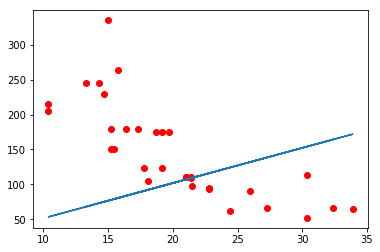

10000 2151.3135 [-5.8448815] [258.8987]


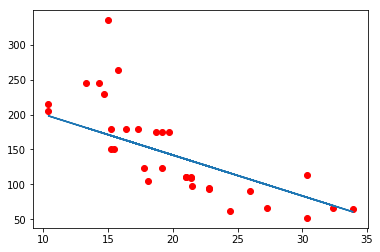

In [102]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(10001):
        ## 여러 노드를 한번에 실행 train노드의 리턴값을 받지 않는다 _
    cv , wv, bv, _ = sess.run([cost, w, b, train], feed_dict = { x : xdata, y :ydata})
    if step % 10000 == 0:
        print (step, cv, wv, bv)    
        plt.plot(xdata, ydata, 'ro')
        plt.plot(xdata, sess.run(w) * xdata + sess.run(b))
    
        plt.show()
 
